In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

%matplotlib widget

# 1

In [2]:
def avg_circles(circles, b):
    avg_x=0
    avg_y=0
    avg_r=0
    for i in range(b):
        #optional - average for multiple circles (can happen when a gauge is at a slight angle)
        avg_x = avg_x + circles[0][i][0]
        avg_y = avg_y + circles[0][i][1]
        avg_r = avg_r + circles[0][i][2]
    avg_x = int(avg_x/(b))
    avg_y = int(avg_y/(b))
    avg_r = int(avg_r/(b))
    return avg_x, avg_y, avg_r

In [3]:
img_color = cv2.imread('images/17.jpeg')
height, width = img_color.shape[:2]
img_resized = cv2.resize(img_color, (width // 2, height // 2), interpolation= cv2.INTER_LINEAR)

# print(img_color)

img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)  #convert to gray
img_gray = cv2.GaussianBlur(img_gray, (5, 5), 0)
img_gray = cv2.medianBlur(img_gray, 5)
    
plt.imshow(img_gray, cmap='gray')
plt.show()

In [8]:
# circles = cv2.HoughCircles(img_gray, cv2.HOUGH_GRADIENT, 1.2, 20)#, np.array([]), 100, 50, int(height*0.35), int(height*0.48))

circles = cv2.HoughCircles(
    img_gray,
    cv2.HOUGH_GRADIENT,
    1,
    20,
    np.array([]),
    param1=100,
    param2=50,
    minRadius = int(height*0.005),
    maxRadius = int(height*0.05))

In [11]:
circles.shape

(1, 1138, 3)

In [8]:
# average found circles, found it to be more accurate than trying to tune HoughCircles parameters to get just the right one
a, b, c = circles.shape
x,y,r = avg_circles(circles, b)

In [9]:
img_disp = img_resized.copy()
cv2.circle(img_disp, (x, y), r, (0, 0, 255), 10, cv2.LINE_AA)  # draw circle
cv2.circle(img_disp, (x, y), 2, (0, 255, 0), 10, cv2.LINE_AA)  # draw center of circle
plt.imshow(img_disp)
plt.show()

# 2

https://russianblogs.com/article/3973607748/

In [52]:
img = cv2.imread('images/17.jpeg')
GrayImage=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
GrayImage= cv2.medianBlur(GrayImage,5)
fig = plt.figure()
plt.imshow(GrayImage, cmap='gray')
plt.show()

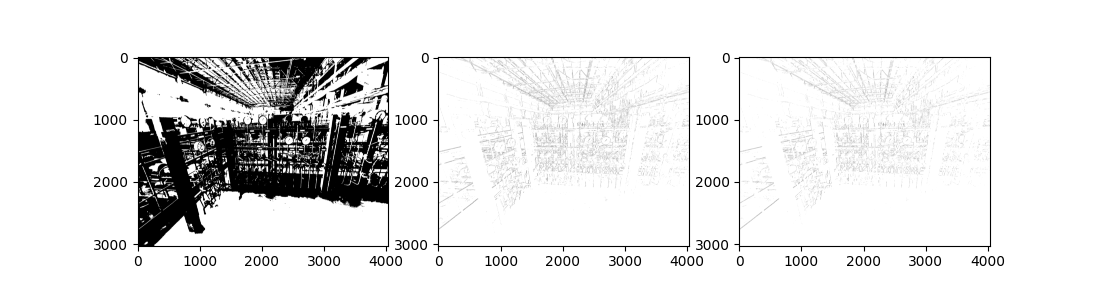

In [53]:
ret,th1 = cv2.threshold(GrayImage,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(GrayImage,255,cv2.ADAPTIVE_THRESH_MEAN_C,  
                    cv2.THRESH_BINARY,3,5)  
th3 = cv2.adaptiveThreshold(GrayImage,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,  
                    cv2.THRESH_BINARY,3,5)

fig = plt.figure(figsize = (11,3))
plt.subplot(1, 3, 1)
plt.imshow(th1, cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(th2, cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(th3, cmap='gray')
plt.show()

In [54]:
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(th2,kernel,iterations=1)
dilation = cv2.dilate(erosion,kernel,iterations=1)
imgray=cv2.Canny(erosion,30,100)

fig = plt.figure(figsize = (11,3))
plt.subplot(1, 3, 1)
plt.imshow(erosion, cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(dilation, cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(imgray, cmap='gray')
plt.show()

In [55]:
# # для 17
circles = cv2.HoughCircles(GrayImage,cv2.HOUGH_GRADIENT,1,50,
                           param1=50,param2=40,
                           minRadius=50,maxRadius=70)

# для 23
# circles = cv2.HoughCircles(GrayImage,cv2.HOUGH_GRADIENT,1,50,
#                            param1=100,param2=70,
#                            minRadius=100,maxRadius=200)

# для 6
# circles = cv2.HoughCircles(imgray,cv2.HOUGH_GRADIENT,1,50,
#                            param1=100,param2=90,
#                            minRadius=600,maxRadius=750)

print(circles)
circles = np.uint16(np.around(circles))

[[[2419.5 1332.5   62.8]
  [1996.5 1012.5   68.3]
  [2697.5 1340.5   68.3]
  [1763.5 1020.5   68.3]
  [1176.5 1357.5   58.3]]]


In [56]:
img_copy = img.copy()
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(img_copy,(i[0],i[1]),i[2],(0,255,0),10)
    # draw the center of the circle
    cv2.circle(img_copy,(i[0],i[1]),2,(0,0,255),10)
print(len(circles[0,:]))

fig = plt.figure(figsize = (11,11))
plt.imshow(img_copy)
plt.show()

5
